## intro to Regression Splines

There are other issues with polynomial regression. For example, it is inherently non-local, i.e., changing the value of Y at one point in the training set can affect the fit of the polynomial for data points that are very far away. Hence, to avoid the use of high degree polynomial on the whole dataset, we can substitute it with many different small degree polynomial functions.

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


### Intro to patsy liberary
Patsy is a great place to transform variables for modelling, specially for linear models.  

[Spline Regression in patsy](https://patsy.readthedocs.io/en/latest/spline-regression.html)

I'll explain the components of the materix used in this example:  
cr() : Natural cubic regression splines (the selected one)  
cc() : cyclic cubic regression splines  
bs() : General B-splines  

-1   : remove the intercept column  

build_design_matrices() : will use the info. then make predictions on a new set of data  (to view full data, use np.asarray(this_obj))


In [2]:
from patsy import dmatrix
from patsy import build_design_matrices

In [3]:
# create initial data to start with
X_train = {"x": np.linspace(0., 1., 100)}
X_test = {"x": [0.1, 0.2, 0.25, 0.5, 0.7, 0.9]}

In [4]:
# Generating natural cubic spline for feature "x" in train data
design_matrix_train = dmatrix("cr(x, df=4)-1", X_train, return_type='dataframe')

# Transform Test Data 
design_matrix_test = pd.DataFrame(np.asarray(build_design_matrices([design_matrix_train.design_info], X_test)[0]))

In [5]:
design_matrix_train

,"cr(x, df=4)[0]","cr(x, df=4)[1]","cr(x, df=4)[2]","cr(x, df=4)[3]"
0,1.000000,0.000000,0.000000,0.000000
1,0.961624,0.048468,-0.012110,0.002018
2,0.923292,0.096836,-0.024153,0.004026
3,0.885049,0.145004,-0.036063,0.006011
4,0.846940,0.192871,-0.047772,0.007962
...,...,...,...,...
95,0.007962,-0.047772,0.192871,0.846940
96,0.006011,-0.036063,0.145004,0.885049
97,0.004026,-0.024153,0.096836,0.923292
98,0.002018,-0.012110,0.048468,0.961624


In [6]:
design_matrix_test

,0,1,2,3
0,0.6272,0.463800,-0.10920,0.018200
1,0.2976,0.830400,-0.15360,0.025600
2,0.1625,0.946875,-0.13125,0.021875
3,-0.0750,0.575000,0.57500,-0.075000
4,0.0114,-0.068400,1.00260,0.054400
5,0.0182,-0.109200,0.46380,0.627200


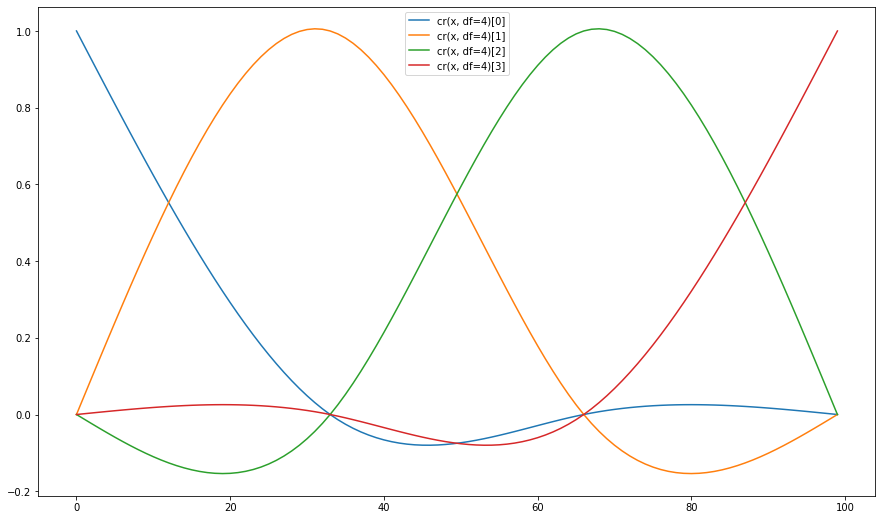

In [8]:
design_matrix_train.plot(figsize=(15,9))
plt.show()

In [ ]:
# Generating natural cubic spline
transformed_x = dmatrix("cr(train,df = 5)-1", {"train": data_x}, return_type='dataframe')

In [ ]:


fit3 = sm.GLM(train_y, transformed_x3).fit()

# Prediction on validation set
pred3 = fit3.predict(dmatrix("cr(valid, df=3)", {"valid": valid_x}, return_type='dataframe'))

# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred3 = fit3.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

# Plot the spline
plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred3,color='g', label='Natural spline')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

In [ ]:
transformed_x3